# Capstone Projekt Rossmann

# Reports

## Individual Store Reports

### Definition of Information and KPIs to be reported

#### Information

- Period
- Store ID
- Store Type
- Assortment
- Competition Distance
- Competition Open Since
- Promo2Since
- Promo2Interval
- Promo2Active


#### KPIs

- Line plot with sales for each week
- Line plot with SalesPerOpenDay for each week
- Line plot with sales per customer for each week
- Line plot with customers for each week
- Line plot with CustomersPerOpenDay for each week
- Rolling mean

#### Input Fields

- StoreId
- StartDate
- EndDate

### Store Report

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.api.types import infer_dtype
import plotly.graph_objs as go
from plotly.subplots import make_subplots



pd.set_option('display.max_columns', None)

In [2]:
# Input fields to define the store and the date range
StoreId = 8
StartDate = "2013-01-01"
EndDate = "2014-12-31"
StartDate = datetime.strptime(StartDate, "%Y-%m-%d")
EndDate = datetime.strptime(EndDate, "%Y-%m-%d")

In [3]:
df = pd.read_csv('weekly_sales_with_store_info.csv', parse_dates=['Date'])

In [4]:
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150525 entries, 0 to 150524
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      150525 non-null  int64         
 1   Date                       150525 non-null  datetime64[ns]
 2   CW                         150525 non-null  int64         
 3   Month                      150525 non-null  int64         
 4   Year                       150525 non-null  int64         
 5   DayOfWeek                  150525 non-null  int64         
 6   Sales                      150525 non-null  int64         
 7   SalesPerCustomer           145809 non-null  float64       
 8   SalesPerOpenDay            145815 non-null  float64       
 9   Customers                  150525 non-null  int64         
 10  CustomersPerOpenDay        145815 non-null  float64       
 11  Open                       150525 non-null  int64   

,Store,Date,CW,Month,Year,DayOfWeek,Sales,SalesPerCustomer,SalesPerOpenDay,Customers,CustomersPerOpenDay,Open,Promo,IsPromo,StateHoliday,IsStateHoliday,SchoolHoliday,IsSchoolHoliday,NumStateHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,IsCompetition,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2Member,Promo2Active
19833,147,2015-05-17,20,5,2015,6,38767,8.938667,7753.400000,4337,867.400000,5,0,0,a,1,0,0,1,d,c,8540.0,NaN,NaN,0,0,NaN,NaN,NaN,0,0
7383,55,2014-10-19,42,10,2014,6,24085,7.470533,4014.166667,3224,537.333333,6,0,0,0,0,0,0,0,a,a,720.0,11.0,2004.0,1,0,NaN,NaN,NaN,0,0
68605,509,2013-06-30,26,6,2013,6,34230,11.002893,5705.000000,3111,518.500000,6,0,0,0,0,0,0,0,a,a,4740.0,7.0,2008.0,1,1,37.0,2009.0,"Jan,Apr,Jul,Oct",1,0
113484,841,2014-08-17,33,8,2014,6,14378,6.459119,2396.333333,2226,371.000000,6,0,0,0,0,5,1,0,a,a,27650.0,8.0,2004.0,1,0,NaN,NaN,NaN,0,0
38109,283,2013-10-06,40,10,2013,6,34735,9.342388,6947.000000,3718,743.600000,5,0,0,a,1,0,0,1,a,a,2260.0,NaN,NaN,0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",0,0


In [75]:
# Generate dataframes based on input fields
df_store = df[(df['Store'] == StoreId) & (df['Date'] >= StartDate) & (df['Date'] <= EndDate)]
StoreType = df_store['StoreType'].iloc[0]
Assortment = df_store['Assortment'].iloc[0]

df_store_compare = df[(df['Store'] != StoreId) & (df['Date'] >= StartDate) & (df['Date'] <= EndDate) & (df['StoreType'] == StoreType) & (df['Assortment'] == Assortment)]
df_store.head()

,Store,Date,CW,Month,Year,DayOfWeek,Sales,SalesPerCustomer,SalesPerOpenDay,Customers,CustomersPerOpenDay,Open,Promo,IsPromo,StateHoliday,IsStateHoliday,SchoolHoliday,IsSchoolHoliday,NumStateHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,IsCompetition,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2Member,Promo2Active
945,8,2013-01-06,1,1,2013,6,16657,7.609411,4164.250000,2189,547.250000,4,0,0,a,1,4,1,1,a,a,7520.0,10.0,2014.0,0,0,NaN,NaN,NaN,0,0
946,8,2013-01-13,2,1,2013,6,32528,8.566763,5421.333333,3797,632.833333,6,5,1,0,0,0,0,0,a,a,7520.0,10.0,2014.0,0,0,NaN,NaN,NaN,0,0
947,8,2013-01-20,3,1,2013,6,22803,7.018467,3800.500000,3249,541.500000,6,0,0,0,0,0,0,0,a,a,7520.0,10.0,2014.0,0,0,NaN,NaN,NaN,0,0
948,8,2013-01-27,4,1,2013,6,33682,8.936588,5613.666667,3769,628.166667,6,5,1,0,0,0,0,0,a,a,7520.0,10.0,2014.0,0,0,NaN,NaN,NaN,0,0
949,8,2013-02-03,5,2,2013,6,23428,7.291628,3904.666667,3213,535.500000,6,0,0,0,0,0,0,0,a,a,7520.0,10.0,2014.0,0,0,NaN,NaN,NaN,0,0


In [76]:
# Create a mean dataframe out of all stores with the same StoreType and Assortment
columns_to_average = ['Sales', 'SalesPerOpenDay', 'SalesPerCustomer', 'Customers', 
                      'CustomersPerOpenDay', 'IsPromo', 'Promo2Active', 
                      'SchoolHoliday', 'NumStateHoliday']

# Group df_store_compare by 'Date' and calculate the mean of the specified columns
mean_df = df_store_compare.groupby('Date')[columns_to_average].mean().reset_index()
mean_df.head()

,Date,Sales,SalesPerOpenDay,SalesPerCustomer,Customers,CustomersPerOpenDay,IsPromo,Promo2Active,SchoolHoliday,NumStateHoliday
0,2013-01-06,22178.847368,5544.711842,8.150710,2783.207895,695.801974,0.0,0.178947,3.992105,1.286842
1,2013-01-13,43842.986842,7307.164474,9.167516,4900.097368,816.682895,1.0,0.178947,0.355263,0.000000
2,2013-01-20,30358.286842,5059.714474,7.941548,3906.305263,651.050877,0.0,0.178947,0.000000,0.000000
3,2013-01-27,40900.478947,6816.746491,9.129393,4602.131579,767.021930,1.0,0.178947,0.000000,0.000000
4,2013-02-03,33617.418421,5602.903070,8.277123,4158.350000,693.058333,0.0,0.092105,0.139474,0.000000


In [77]:
# Print information for:
#- Period
#- Store ID
#- Store Type
#- Assortment
#- Competition Distance
#- Competition Open Since
#- Promo2Since
#- Promo2Interval
#- Promo2Active

print(f"Period: {StartDate.strftime('%Y-%m-%d')} to {EndDate.strftime('%Y-%m-%d')}")
print(f"Store ID: {StoreId}")
print(f"Store Type: {StoreType}")
print(f"Assortment: {Assortment}")

if df_store['IsCompetition'].iloc[0] == 1:
	print(f"Competition Distance: {int(df_store['CompetitionDistance'].iloc[0])}")
	CompetitionOpenSince = datetime(int(df_store['CompetitionOpenSinceYear'].iloc[0]), int(df_store['CompetitionOpenSinceMonth'].iloc[0]), 1)
	print(f"Competition Open Since: {CompetitionOpenSince.strftime('%Y-%m-%d')}")
else:
	print("Competition: None")

if df_store['Promo2'].iloc[0] == 1:
	Promo2Since = datetime.strptime(f"{int(df_store['Promo2SinceYear'].iloc[0])} {int(df_store['Promo2SinceWeek'].iloc[0])} 1", '%G %V %u').date()
	print(f"Promo2Since: {Promo2Since.strftime('%Y-%m-%d')}")
	print(f"PromoInterval: {df_store['PromoInterval'].iloc[0]}")
else:
	print("Promo2: None")



Period: 2013-01-01 to 2014-12-31
Store ID: 8
Store Type: a
Assortment: a
Competition: None
Promo2: None


In [78]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

rolling_mean_window = 12
import warnings

# Suppress all warnings in the current cell
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	# Calculate the rolling mean for the last X weeks for each column
	df_store['Sales_rolling_mean'] = df_store['Sales'].rolling(window=rolling_mean_window).mean()
	df_store['SalesPerOpenDay_rolling_mean'] = df_store['SalesPerOpenDay'].rolling(window=rolling_mean_window).mean()
	df_store['SalesPerCustomer_rolling_mean'] = df_store['SalesPerCustomer'].rolling(window=rolling_mean_window).mean()
	df_store['Customers_rolling_mean'] = df_store['Customers'].rolling(window=rolling_mean_window).mean()
	df_store['CustomersPerOpenDay_rolling_mean'] = df_store['CustomersPerOpenDay'].rolling(window=rolling_mean_window).mean()

# Create a subplot grid
fig = make_subplots(rows=9, cols=1, subplot_titles=('Sales', 'SalesPerOpenDay', 'SalesPerCustomer', 'Customers', 'CustomersPerOpenDay', 'IsPromo', 'Promo2Active', 'SchoolHoliday', 'NumStateHoliday'))

# Add the original and rolling mean plots to the subplot grid
# Sales
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Sales'], mode='lines+markers', name='Sales', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Sales_rolling_mean'], mode='lines', name=f'Sales {rolling_mean_window}-Week Rolling Mean', line=dict(dash='dot', color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['Sales'], mode='lines+markers', name='Sales compare', line=dict(dash='dash', color='green')), row=1, col=1)

# SalesPerOpenDay
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SalesPerOpenDay'], mode='lines+markers', name='SalesPerOpenDay', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SalesPerOpenDay_rolling_mean'], mode='lines', name=f'SalesPerOpenDay {rolling_mean_window}-Week Rolling Mean', line=dict(dash='dot', color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['SalesPerOpenDay'], mode='lines+markers', name='SalesPerOpenDay compare', line=dict(dash='dash', color='green')), row=2, col=1)

# SalesPerCustomer
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SalesPerCustomer'], mode='lines+markers', name='SalesPerCustomer', line=dict(color='blue')), row=3, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SalesPerCustomer_rolling_mean'], mode='lines', name=f'SalesPerCustomer {rolling_mean_window}-Week Rolling Mean', line=dict(dash='dot', color='red')), row=3, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['SalesPerCustomer'], mode='lines+markers', name='SalesPerCustomer compare', line=dict(dash='dash', color='green')), row=3, col=1)

# Customers
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Customers'], mode='lines+markers', name='Customers', line=dict(color='blue')), row=4, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Customers_rolling_mean'], mode='lines', name=f'Customers {rolling_mean_window}-Week Rolling Mean', line=dict(dash='dot', color='red')), row=4, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['Customers'], mode='lines+markers', name='Customers compare', line=dict(dash='dash', color='green')), row=4, col=1)

# CustomersPerOpenDay
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['CustomersPerOpenDay'], mode='lines+markers', name='CustomersPerOpenDay', line=dict(color='blue')), row=5, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['CustomersPerOpenDay_rolling_mean'], mode='lines', name=f'CustomersPerOpenDay {rolling_mean_window}-Week Rolling Mean', line=dict(dash='dot', color='red')), row=5, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['CustomersPerOpenDay'], mode='lines+markers', name='CustomersPerOpenDay compare', line=dict(dash='dash', color='green')), row=5, col=1)

# IsPromo
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['IsPromo'], mode='lines+markers', name='IsPromo', line=dict(color='blue')), row=6, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['IsPromo'], mode='lines+markers', name='IsPromo compare', line=dict(dash='dash', color='green')), row=6, col=1)

# Promo2Active
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Promo2Active'], mode='lines+markers', name='Promo2Active', line=dict(color='blue')), row=7, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['Promo2Active'], mode='lines+markers', name='Promo2Active compare', line=dict(dash='dash', color='green')), row=7, col=1)

# SchoolHoliday
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SchoolHoliday'], mode='lines+markers', name='Amount of school holidays', line=dict(color='blue')), row=8, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['SchoolHoliday'], mode='lines+markers', name='Amount of school holidays compare', line=dict(dash='dash', color='green')), row=8, col=1)

# NumStateHoliday
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['NumStateHoliday'], mode='lines+markers', name='Amount of state holiday', line=dict(color='blue')), row=9, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['NumStateHoliday'], mode='lines+markers', name='Amount of state holiday compare', line=dict(dash='dash', color='green')), row=9, col=1)

# Update layout (set layout properties and show the legend)
fig.update_layout(height=1800, width=1400, title_text=f"Store {StoreId} Weekly Overview", showlegend=True)

# Show the figure
fig.show()


In [79]:
monthly_summary_df_store = df_store.groupby(['Year', 'Month']).agg(
    {
        'Sales': 'sum',
        'SalesPerOpenDay': 'mean',
        'SalesPerCustomer': 'mean',
        'Customers': 'sum',
        'CustomersPerOpenDay': 'mean',
        'IsPromo': 'sum', 
        'Promo2Active': 'sum',
        'SchoolHoliday': 'sum',
        'NumStateHoliday': 'sum'
    }
).reset_index()

# Add a new 'Date' column representing the first day of each month
monthly_summary_df_store['Date'] = pd.to_datetime(monthly_summary_df_store['Year'].astype(str) + '-' + monthly_summary_df_store['Month'].astype(str) + '-01')

# Reorder columns
monthly_summary_df_store = monthly_summary_df_store[['Date', 'Year', 'Month', 'Sales', 'SalesPerOpenDay', 'SalesPerCustomer', 'Customers', 'CustomersPerOpenDay', 'IsPromo', 'Promo2Active', 'SchoolHoliday', 'NumStateHoliday']]

monthly_summary_df_store.head()

,Date,Year,Month,Sales,SalesPerOpenDay,SalesPerCustomer,Customers,CustomersPerOpenDay,IsPromo,Promo2Active,SchoolHoliday,NumStateHoliday
0,2013-01-01,2013,1,105670,4749.937500,8.032807,13004,587.437500,2,0,4,1
1,2013-02-01,2013,2,118482,4936.750000,8.139782,14390,599.583333,2,0,0,0
2,2013-03-01,2013,3,153377,5337.513333,8.323104,18284,634.346667,3,0,5,1
3,2013-04-01,2013,4,110359,4774.641667,7.984870,13718,594.566667,2,0,7,1
4,2013-05-01,2013,5,109766,5191.116667,8.254283,13127,621.908333,2,0,1,3


In [84]:
df_store = monthly_summary_df_store

df_store_compare = df[(df['Store'] != StoreId) & (df['Date'] >= StartDate) & (df['Date'] <= EndDate) & (df['StoreType'] == StoreType) & (df['Assortment'] == Assortment)]


monthly_summary_df_store_all = df_store_compare.groupby(['Year', 'Month']).agg(
    {
        'Sales': 'mean',
        'SalesPerOpenDay': 'mean',
        'SalesPerCustomer': 'mean',
        'Customers': 'mean',
        'CustomersPerOpenDay': 'mean',
        'IsPromo': 'mean', 
        'Promo2Active': 'mean',
        'SchoolHoliday': 'mean',
        'NumStateHoliday': 'mean'
    }
).reset_index()

# Add a new 'Date' column representing the first day of each month
monthly_summary_df_store_all['Date'] = pd.to_datetime(monthly_summary_df_store_all['Year'].astype(str) + '-' + monthly_summary_df_store_all['Month'].astype(str) + '-01')

# Reorder columns
monthly_summary_df_store_all = monthly_summary_df_store_all[['Date', 'Year', 'Month', 'Sales', 'SalesPerOpenDay', 'SalesPerCustomer', 'Customers', 'CustomersPerOpenDay', 'IsPromo', 'Promo2Active', 'SchoolHoliday', 'NumStateHoliday']]
mean_df = monthly_summary_df_store_all




rolling_mean_window = 3
import warnings

# Suppress all warnings in the current cell
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	# Calculate the rolling mean for the last X Months for each column
	df_store['Sales_rolling_mean'] = df_store['Sales'].rolling(window=rolling_mean_window).mean()
	df_store['SalesPerOpenDay_rolling_mean'] = df_store['SalesPerOpenDay'].rolling(window=rolling_mean_window).mean()
	df_store['SalesPerCustomer_rolling_mean'] = df_store['SalesPerCustomer'].rolling(window=rolling_mean_window).mean()
	df_store['Customers_rolling_mean'] = df_store['Customers'].rolling(window=rolling_mean_window).mean()
	df_store['CustomersPerOpenDay_rolling_mean'] = df_store['CustomersPerOpenDay'].rolling(window=rolling_mean_window).mean()

# Create a subplot grid
fig = make_subplots(rows=9, cols=1, subplot_titles=('Sales', 'SalesPerOpenDay', 'SalesPerCustomer', 'Customers', 'CustomersPerOpenDay', 'IsPromo', 'Promo2Active', 'SchoolHoliday', 'NumStateHoliday'))

# Add the original and rolling mean plots to the subplot grid
# Sales
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Sales'], mode='lines+markers', name='Sales', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Sales_rolling_mean'], mode='lines', name=f'Sales {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['Sales'], mode='lines+markers', name='Sales compare', line=dict(dash='dash', color='green')), row=1, col=1)

# SalesPerOpenDay
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SalesPerOpenDay'], mode='lines+markers', name='SalesPerOpenDay', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SalesPerOpenDay_rolling_mean'], mode='lines', name=f'SalesPerOpenDay {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['SalesPerOpenDay'], mode='lines+markers', name='SalesPerOpenDay compare', line=dict(dash='dash', color='green')), row=2, col=1)

# SalesPerCustomer
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SalesPerCustomer'], mode='lines+markers', name='SalesPerCustomer', line=dict(color='blue')), row=3, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SalesPerCustomer_rolling_mean'], mode='lines', name=f'SalesPerCustomer {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=3, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['SalesPerCustomer'], mode='lines+markers', name='SalesPerCustomer compare', line=dict(dash='dash', color='green')), row=3, col=1)

# Customers
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Customers'], mode='lines+markers', name='Customers', line=dict(color='blue')), row=4, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Customers_rolling_mean'], mode='lines', name=f'Customers {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=4, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['Customers'], mode='lines+markers', name='Customers compare', line=dict(dash='dash', color='green')), row=4, col=1)

# CustomersPerOpenDay
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['CustomersPerOpenDay'], mode='lines+markers', name='CustomersPerOpenDay', line=dict(color='blue')), row=5, col=1)
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['CustomersPerOpenDay_rolling_mean'], mode='lines', name=f'CustomersPerOpenDay {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=5, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['CustomersPerOpenDay'], mode='lines+markers', name='CustomersPerOpenDay compare', line=dict(dash='dash', color='green')), row=5, col=1)

# IsPromo
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['IsPromo'], mode='lines+markers', name='IsPromo', line=dict(color='blue')), row=6, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['IsPromo'], mode='lines+markers', name='IsPromo compare', line=dict(dash='dash', color='green')), row=6, col=1)

# Promo2Active
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['Promo2Active'], mode='lines+markers', name='Promo2Active', line=dict(color='blue')), row=7, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['Promo2Active'], mode='lines+markers', name='Promo2Active compare', line=dict(dash='dash', color='green')), row=7, col=1)

# SchoolHoliday
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['SchoolHoliday'], mode='lines+markers', name='Amount of school holidays', line=dict(color='blue')), row=8, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['SchoolHoliday'], mode='lines+markers', name='Amount of school holidays compare', line=dict(dash='dash', color='green')), row=8, col=1)

# NumStateHoliday
fig.add_trace(go.Scatter(x=df_store['Date'], y=df_store['NumStateHoliday'], mode='lines+markers', name='Amount of state holiday', line=dict(color='blue')), row=9, col=1)
fig.add_trace(go.Scatter(x=mean_df['Date'], y=mean_df['NumStateHoliday'], mode='lines+markers', name='Amount of state holiday compare', line=dict(dash='dash', color='green')), row=9, col=1)

# Update layout (set layout properties and show the legend)
fig.update_layout(height=1800, width=1400, title_text=f"Store {StoreId} Monthly Overview", showlegend=True)

# Show the figure
fig.show()


In [81]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplot grid
fig = make_subplots(rows=9, cols=1, subplot_titles=('Sales', 'SalesPerOpenDay', 'SalesPerCustomer', 'Customers', 'CustomersPerOpenDay', 'IsPromo', 'Promo2Active', 'SchoolHoliday', 'NumStateHoliday'))

# Add each plot to the subplot grid with specific names
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['Sales'], mode='lines+markers', name='Sales'), row=1, col=1)
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['SalesPerOpenDay'], mode='lines+markers', name='SalesPerOpenDay'), row=2, col=1)
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['SalesPerCustomer'], mode='lines+markers', name='SalesPerCustomer'), row=3, col=1)
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['Customers'], mode='lines+markers', name='Customers'), row=4, col=1)
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['CustomersPerOpenDay'], mode='lines+markers', name='CustomersPerOpenDay'), row=5, col=1)
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['IsPromo'], mode='lines+markers', name='IsPromo'), row=6, col=1)
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['Promo2Active'], mode='lines+markers', name='Promo2Active'), row=7, col=1)
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['SchoolHoliday'], mode='lines+markers', name='Amount of school holidays'), row=8, col=1)
fig.add_trace(go.Scatter(x=monthly_summary_df_store['Date'], y=monthly_summary_df_store['NumStateHoliday'], mode='lines+markers', name='Amount of state holiday'), row=9, col=1)

# Update layout (set layout properties and hide the legend)
fig.update_layout(height=1600, width=1100, title_text=f"Store {StoreId} Monthly Overview", showlegend=False)

# Show the figure
fig.show()


## Overall Report

### Definition of Information and KPIs to be reported

#### Information

- Period
- Number of Stores
- Number of Stores in each Store Type
- Number of Stores in each Assortment
- Number of StoreType in each Assortment
- Number of Assortment in each StoreType
- Number of Stores with Promo
- Number of Stores without Promo
- Number of Stores with Promo2
- Number of Stores without Promo2
- Number of Stores with Competition



#### KPIs

- Line plot with sales for each week for all stores
- Line plot with sales for each week for each store type
- Line plot with sales for each week for each assortment

- Line plot with SalesPerOpenDay for each week for all stores
- Line plot with SalesPerOpenDay for each week for each store type
- Line plot with SalesPerOpenDay for each week for each assortment

- Line plot with sales per customer for each week for all stores
- Line plot with sales per customer for each week for each store type
- Line plot with sales per customer for each week for each assortment

- Line plot with customers for each week for all stores
- Line plot with customers for each week for each store type
- Line plot with customers for each week for each assortment

- Line plot with CustomersPerOpenDay for each week for all stores
- Line plot with CustomersPerOpenDay for each week for each store type
- Line plot with CustomersPerOpenDay for each week for each assortment



- Bar plot with amount of stores that have promo and no promo
- Bar plot with amount of stores that have promo2 and no promo2

#### Input Fields

- StartDate
- EndDate
- (StoreType)
- (Assortment)

In [ ]:
StartDate = "2013-01-01"
EndDate = "2014-12-31"
StartDate = datetime.strptime(StartDate, "%Y-%m-%d")
EndDate = datetime.strptime(EndDate, "%Y-%m-%d")

In [6]:
df_all_stores = df[(df['Date'] >= StartDate) & (df['Date'] <= EndDate)]

In [42]:
monthly_summary = df_all_stores.groupby(['Year', 'Month']).agg(
    {
        'Sales': 'sum',
        'SalesPerOpenDay': 'mean',
        'SalesPerCustomer': 'mean',
        'Customers': 'sum',
        'CustomersPerOpenDay': 'mean',
        'IsPromo': 'mean', 
        'Promo2Active': 'sum',
        'SchoolHoliday': 'mean',
        'NumStateHoliday': 'mean'
    }
).reset_index()

# Add a new 'Date' column representing the first day of each month
monthly_summary['Date'] = pd.to_datetime(monthly_summary['Year'].astype(str) + '-' + monthly_summary['Month'].astype(str) + '-01')

# Reorder columns
monthly_summary = monthly_summary[['Date', 'Year', 'Month', 'Sales', 'SalesPerOpenDay', 'SalesPerCustomer', 'Customers', 'CustomersPerOpenDay', 'IsPromo', 'Promo2Active', 'SchoolHoliday', 'NumStateHoliday']]

monthly_summary.head()



,Date,Year,Month,Sales,SalesPerOpenDay,SalesPerCustomer,Customers,CustomersPerOpenDay,IsPromo,Promo2Active,SchoolHoliday,NumStateHoliday
0,2013-01-01,2013,1,155822491,6322.836886,9.273179,17471528,709.885841,0.5,912,1.141928,0.319058
1,2013-02-01,2013,2,171439913,6427.544368,9.342311,19190788,717.751004,0.5,392,0.604933,0.000000
2,2013-03-01,2013,3,225584447,7033.858730,9.451784,24932037,773.210937,0.6,339,1.020448,0.200000
3,2013-04-01,2013,4,162826157,6324.883565,9.090353,18786879,728.266352,0.5,952,1.192601,0.250000
4,2013-05-01,2013,5,164459743,6956.306618,9.295173,18548458,781.232953,0.5,408,0.562556,0.750000


#### Information

In [25]:
df_all_stores

,Store,Date,CW,Month,Year,DayOfWeek,Sales,SalesPerCustomer,SalesPerOpenDay,Customers,CustomersPerOpenDay,Open,Promo,IsPromo,StateHoliday,IsStateHoliday,SchoolHoliday,IsSchoolHoliday,NumStateHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,IsCompetition,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Promo2Member,Promo2Active
0,1,2013-01-06,1,1,2013,6,19340,7.736000,4835.000000,2500,625.000000,4,0,0,a,1,6,1,1,c,a,1270.0,9.0,2008.0,1,0,NaN,NaN,NaN,0,0
1,1,2013-01-13,2,1,2013,6,32952,8.410413,5492.000000,3918,653.000000,6,5,1,0,0,5,1,0,c,a,1270.0,9.0,2008.0,1,0,NaN,NaN,NaN,0,0
2,1,2013-01-20,3,1,2013,6,25978,7.602575,4329.666667,3417,569.500000,6,0,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,1,0,NaN,NaN,NaN,0,0
3,1,2013-01-27,4,1,2013,6,33071,8.563180,5511.833333,3862,643.666667,6,5,1,0,0,0,0,0,c,a,1270.0,9.0,2008.0,1,0,NaN,NaN,NaN,0,0
4,1,2013-02-03,5,2,2013,6,28693,8.057568,4782.166667,3561,593.500000,6,0,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,1,0,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150489,1115,2014-11-30,48,11,2014,6,53074,15.786437,8845.666667,3362,560.333333,6,5,1,0,0,0,0,0,d,c,5350.0,NaN,NaN,0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,0
150490,1115,2014-12-07,49,12,2014,6,54667,16.260262,9111.166667,3362,560.333333,6,5,1,0,0,0,0,0,d,c,5350.0,NaN,NaN,0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1
150491,1115,2014-12-14,50,12,2014,6,36944,14.470819,6157.333333,2553,425.500000,6,0,0,0,0,0,0,0,d,c,5350.0,NaN,NaN,0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1
150492,1115,2014-12-21,51,12,2014,6,65774,17.155451,10962.333333,3834,639.000000,6,5,1,0,0,0,0,0,d,c,5350.0,NaN,NaN,0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1


In [36]:
#- Period
print(f"Period: {StartDate.strftime('%Y-%m-%d')} to {EndDate.strftime('%Y-%m-%d')}"	)

#- Number of Stores
print(f"Number of Stores: {df_all_stores['Store'].nunique()}")

#- Number of Stores in each Store Type
print("Number of Stores in each Store Type:", df_all_stores.groupby('StoreType')['Store'].nunique())
store_counts = df_all_stores.groupby('StoreType')['Store'].nunique().reset_index(name='NumberOfStores')
fig = px.pie(store_counts, names='StoreType', values='NumberOfStores', title='Number of Stores in each Store Type')
fig.update_traces(hovertemplate='%{label}: %{value} (<b>%{percent}</b>)')
fig.show()

#- Number of Stores in each Assortment
print("Number of Stores in each Assortment:", df_all_stores.groupby('Assortment')['Store'].nunique())
assortment_counts = df_all_stores.groupby('Assortment')['Store'].nunique().reset_index(name='NumberOfStores')
fig = px.pie(assortment_counts, names='Assortment', values='NumberOfStores', title='Number of Stores in each Assortment')
fig.update_traces(hovertemplate='%{label}: %{value} (<b>%{percent}</b>)')
fig.show()

#- Number of Stores with Promo2
print(f"Number of Stores with Promo2: {df_all_stores.groupby('Promo2')['Store'].nunique().loc[1]}")

#- Number of Stores without Promo2
print(f"Number of Stores without Promo2: {df_all_stores.groupby('Promo2')['Store'].nunique().loc[0]}")

#- Number of Stores with Competition
print(f"Number of Stores with Competition: {df_all_stores.groupby('IsCompetition')['Store'].nunique().loc[1]}")

#- Number of Stores without Competition
print(f"Number of Stores without Competition: {df_all_stores.groupby('IsCompetition')['Store'].nunique().loc[0]}")

Period: 2013-01-01 to 2014-12-31
Number of Stores: 1115
Number of Stores in each Store Type: StoreType
a    602
b     17
c    148
d    348
Name: Store, dtype: int64


Number of Stores in each Assortment: Assortment
a    593
b      9
c    513
Name: Store, dtype: int64


Number of Stores with Promo2: 571
Number of Stores without Promo2: 544
Number of Stores with Competition: 723
Number of Stores without Competition: 545


#### KPIs

In [48]:
rolling_mean_window = 3
import warnings

# Suppress all warnings in the current cell
with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	# Calculate the rolling mean for the last X Months for each column
	monthly_summary['Sales_rolling_mean'] = monthly_summary['Sales'].rolling(window=rolling_mean_window).mean()
	monthly_summary['SalesPerOpenDay_rolling_mean'] = monthly_summary['SalesPerOpenDay'].rolling(window=rolling_mean_window).mean()
	monthly_summary['SalesPerCustomer_rolling_mean'] = monthly_summary['SalesPerCustomer'].rolling(window=rolling_mean_window).mean()
	monthly_summary['Customers_rolling_mean'] = monthly_summary['Customers'].rolling(window=rolling_mean_window).mean()
	monthly_summary['CustomersPerOpenDay_rolling_mean'] = monthly_summary['CustomersPerOpenDay'].rolling(window=rolling_mean_window).mean()

# Create a subplot grid
fig = make_subplots(rows=10, cols=1, subplot_titles=('Sales', 'SalesPerOpenDay', 'SalesPerCustomer', 'Customers', 'CustomersPerOpenDay', 'IsPromo', 'Promo2Active', 'SchoolHoliday', 'NumStateHoliday'))

# Add the original and rolling mean plots to the subplot grid
# Sales
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['Sales'], mode='lines+markers', name='Sales', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['Sales_rolling_mean'], mode='lines', name=f'Sales {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=1, col=1)
    
# SalesPerOpenDay
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['SalesPerOpenDay'], mode='lines+markers', name='SalesPerOpenDay', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['SalesPerOpenDay_rolling_mean'], mode='lines', name=f'SalesPerOpenDay {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=2, col=1)

# SalesPerCustomer
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['SalesPerCustomer'], mode='lines+markers', name='SalesPerCustomer', line=dict(color='blue')), row=3, col=1)
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['SalesPerCustomer_rolling_mean'], mode='lines', name=f'SalesPerCustomer {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=3, col=1)

# Customers
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['Customers'], mode='lines+markers', name='Customers', line=dict(color='blue')), row=4, col=1)
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['Customers_rolling_mean'], mode='lines', name=f'Customers {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=4, col=1)

# CustomersPerOpenDay
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['CustomersPerOpenDay'], mode='lines+markers', name='CustomersPerOpenDay', line=dict(color='blue')), row=5, col=1)
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['CustomersPerOpenDay_rolling_mean'], mode='lines', name=f'CustomersPerOpenDay {rolling_mean_window}-Month Rolling Mean', line=dict(dash='dot', color='red')), row=5, col=1)

# IsPromo
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['IsPromo'], mode='lines+markers', name='IsPromo', line=dict(color='blue')), row=6, col=1)

# Promo2Active
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['Promo2Active'], mode='lines+markers', name='Promo2Active', line=dict(color='blue')), row=7, col=1)

# SchoolHoliday
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['SchoolHoliday'], mode='lines+markers', name='Amount of school holidays', line=dict(color='blue')), row=8, col=1)

# NumStateHoliday
fig.add_trace(go.Scatter(x=monthly_summary['Date'], y=monthly_summary['NumStateHoliday'], mode='lines+markers', name='Amount of state holiday', line=dict(color='blue')), row=9, col=1)

# Update layout (set layout properties and show the legend)
fig.update_layout(height=1800, width=1400, title_text=f"Store {StoreId} Monthly Overview", showlegend=True)

# Show the figure
fig.show()

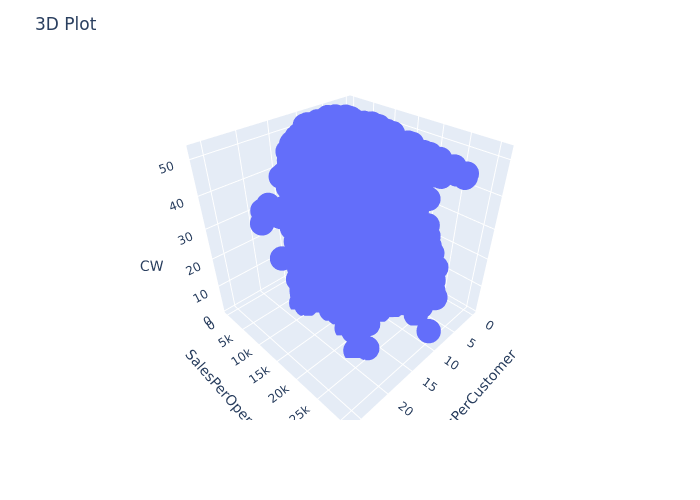

In [83]:
from IPython.display import Image
Image(filename="./3D Plot.png")